# Image Classification - The Multi-class Weather Dataset

**Submission deadline: Friday 5 April, 11:55pm**

**Assessment weight: 15% of the total unit assessment.**

**Versions**

- Wednesday 13 March: Initial release

*Unless a Special Consideration request has been submitted and approved, a 5% penalty (of the total possible mark of the task) will be applied for each day a written report or presentation assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of ‘0’ will be awarded even if the assessment is submitted. The submission time for all uploaded assessments is **11:55 pm**. A 1-hour grace period will be provided to students who experience a technical concern. For any late submission of time-sensitive tasks, such as scheduled tests/exams, performance assessments/presentations, and/or scheduled practical assessments/labs, please apply for [Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration).*

In this assignment you will complete tasks for an end-to-end image classification application. We will train and test the data using the Multi-class Weather Dataset (MWD):

- https://data.mendeley.com/datasets/4drtyfjtfy/1

The MWD contains labelled images representing various weather scenarios. It is a small and popular dataset for practice with image classification.

# Connect to GitHub Classroom

Please follow these steps to connect:

1. Follow this invitation link and accept the invitation: https://classroom.github.com/a/TGh1XJFW
2. The link may ask you to sign in to GitHub (if you haven't signed in earlier). If you don't have a GitHub account, you will need to register.
3. Once you have logged in with GitHub, you may need to select your email address to associate your GitHub account with your email address (if you haven't done it in a previous COMP3420 activity). If you can't find your email address, please skip this step and contact diego.molla-aliod@mq.edu.au so that he can do the association manually.
4. Wait a minute or two, and refresh the browser until it indicates that your assignment repository has been created. Your repository is private to you, and you have administration privileges. Only you and the lecture will have access to it. The repository will be listed under the list of repositories belonging to this offering of COMP3420: https://github.com/orgs/COMP3420-2024S1/repositories
5. In contrast with assignment 1 and the practical sessions, your assignment repository will be empty and will not include starter code. you need to add this Jupyter notebook and commit the changes.

Please use the github repository linked to this GitHub classroom. Make sure that you continuously push commits and you provide useful commit comments. Note the following:

*  **1 mark of the assessment of this assignment is related to good practice with the use of GitHub.**
*  **We will also use github as a tool to check for possible plagiarism or contract cheating. For example, if someone only makes commits on the last day, we may investigate whether there was plagiarism or contract cheating.**


# Tasks
## Task 1 - Data exploration, preparation, and partition (4 marks)

Download the MWD from this site and unzip it:

- https://data.mendeley.com/datasets/4drtyfjtfy/1

You will observe that the zipped file contains 1,125 images representing various weather conditions. To facilitate the assessment of this assignment, please make sure that the images are in a folder named `dataset2` and this folder is in the same place as this jupyter notebook.

### 1.1 - data partition (2 marks)

Generate three CSV files named `my_training.csv`, `my_validation.csv`, and `my_test.csv` that partition the dataset into the training, validation, and test set. Each CSV file contains the following two fields:

- File path
- Image label

For example, the file `my_training.csv` could start like this:

```csv
dataset2/cloudy1.jpg,cloudy
dataset2/shine170.jpg,shine
dataset2/shine116.jpg,shine
```

Make sure that the partitions are created randomly, so that the label distribution is similar in each partition. Also, make sure that the samples are sorted in no particular order (randomly)

Display the label distribution of each partition, and display the first 10 rows of each partition.

The following sample files are available together with these instructions. Your files should look similar to these.

- `training.csv`
- `validation.csv`
- `test.csv`

**For the subsequent tasks in this assignment, use the files we provide (`training.csv`, `validation.csv`, `test.csv`). Do not use the files that you have generated, so that any errors generated by your solution do not carry to the rest of the assignment. Also, the files we provide conveniently removed references to images that have a number of channels different from 3.**




In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
import cv2
import glob

In [2]:
import random
image_folder = 'dataset2'

# Get a list of all image file names in the folder
file_path = [(image_folder + "/" + file) for file in os.listdir(image_folder)]

# Shuffle the list of file names randomly
random.shuffle(file_path)

file_path

['dataset2/sunrise183.jpg',
 'dataset2/sunrise264.jpg',
 'dataset2/sunrise72.jpg',
 'dataset2/sunrise5.jpg',
 'dataset2/rain67.jpg',
 'dataset2/sunrise295.jpg',
 'dataset2/sunrise309.jpg',
 'dataset2/cloudy217.jpg',
 'dataset2/rain213.jpg',
 'dataset2/shine162.jpg',
 'dataset2/shine13.jpg',
 'dataset2/cloudy207.jpg',
 'dataset2/shine33.jpg',
 'dataset2/shine105.jpg',
 'dataset2/sunrise346.jpg',
 'dataset2/sunrise185.jpg',
 'dataset2/sunrise198.jpg',
 'dataset2/sunrise174.jpg',
 'dataset2/cloudy226.jpg',
 'dataset2/cloudy49.jpg',
 'dataset2/cloudy42.jpg',
 'dataset2/shine249.jpg',
 'dataset2/rain109.jpg',
 'dataset2/sunrise331.jpg',
 'dataset2/cloudy260.jpg',
 'dataset2/cloudy232.jpg',
 'dataset2/cloudy262.jpg',
 'dataset2/cloudy22.jpg',
 'dataset2/cloudy274.jpg',
 'dataset2/cloudy285.jpg',
 'dataset2/sunrise137.jpg',
 'dataset2/shine209.jpg',
 'dataset2/cloudy175.jpg',
 'dataset2/shine123.jpg',
 'dataset2/cloudy115.jpg',
 'dataset2/cloudy39.jpg',
 'dataset2/rain190.jpg',
 'dataset2/clo

In [3]:
#extracting the image label and checking the extraction is right.
import re
labels=[]
for i in file_path:
    image_label = re.match(r'^([a-zA-Z]+)', i.split("/")[-1]).group()
    labels.append(image_label)
    print(i,",",image_label)

dataset2/sunrise183.jpg , sunrise
dataset2/sunrise264.jpg , sunrise
dataset2/sunrise72.jpg , sunrise
dataset2/sunrise5.jpg , sunrise
dataset2/rain67.jpg , rain
dataset2/sunrise295.jpg , sunrise
dataset2/sunrise309.jpg , sunrise
dataset2/cloudy217.jpg , cloudy
dataset2/rain213.jpg , rain
dataset2/shine162.jpg , shine
dataset2/shine13.jpg , shine
dataset2/cloudy207.jpg , cloudy
dataset2/shine33.jpg , shine
dataset2/shine105.jpg , shine
dataset2/sunrise346.jpg , sunrise
dataset2/sunrise185.jpg , sunrise
dataset2/sunrise198.jpg , sunrise
dataset2/sunrise174.jpg , sunrise
dataset2/cloudy226.jpg , cloudy
dataset2/cloudy49.jpg , cloudy
dataset2/cloudy42.jpg , cloudy
dataset2/shine249.jpg , shine
dataset2/rain109.jpg , rain
dataset2/sunrise331.jpg , sunrise
dataset2/cloudy260.jpg , cloudy
dataset2/cloudy232.jpg , cloudy
dataset2/cloudy262.jpg , cloudy
dataset2/cloudy22.jpg , cloudy
dataset2/cloudy274.jpg , cloudy
dataset2/cloudy285.jpg , cloudy
dataset2/sunrise137.jpg , sunrise
dataset2/shine2

In [4]:
#finding the unique image labels in data
set(labels)

{'cloudy', 'rain', 'shine', 'sunrise'}

In [5]:
# Function to write data to CSV file
def write_to_csv(data, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['File path', 'Image label'])
        writer.writerows(data)

**Creating my_training.csv file**

In [6]:
#creating my_training.csv file
import csv
train_size = int(0.7 * len(file_path))
train_set = file_path[:train_size]
train_labels = [re.match(r'^([a-zA-Z]+)', path.split("/")[-1]).group() for path in train_set]
train_data = list(zip(train_set, train_labels))
write_to_csv(train_data, 'my_training.csv')

In [7]:
df=pd.read_csv("my_training.csv")
df.shape

(787, 2)

**The label distribution of my_taining.csv file**

In [8]:
label_counts = df['Image label'].value_counts()
label_counts

sunrise    253
cloudy     211
shine      179
rain       144
Name: Image label, dtype: int64

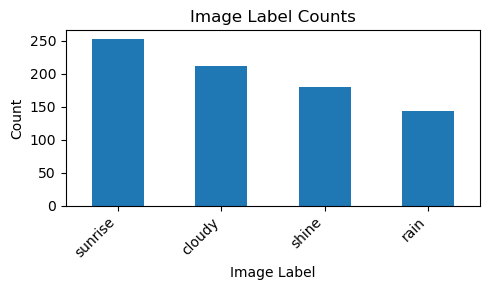

In [9]:
plt.figure(figsize=(5, 3))
label_counts.plot(kind='bar')
plt.title('Image Label Counts')
plt.xlabel('Image Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

****The first 10 rows of my_taining.csv file****

In [10]:
df.head(10)

,File path,Image label
0,dataset2/sunrise183.jpg,sunrise
1,dataset2/sunrise264.jpg,sunrise
2,dataset2/sunrise72.jpg,sunrise
3,dataset2/sunrise5.jpg,sunrise
4,dataset2/rain67.jpg,rain
5,dataset2/sunrise295.jpg,sunrise
6,dataset2/sunrise309.jpg,sunrise
7,dataset2/cloudy217.jpg,cloudy
8,dataset2/rain213.jpg,rain
9,dataset2/shine162.jpg,shine


**Creating my_validation.csv file**

In [11]:
#creating my_validation.csv file
import csv
val_size = int(0.15 * len(file_path))
val_set = file_path[train_size:train_size + val_size]
val_labels = [re.match(r'^([a-zA-Z]+)', path.split("/")[-1]).group() for path in val_set]
val_data = list(zip(val_set, val_labels))
write_to_csv(val_data, 'my_validation.csv')

In [12]:
df1=pd.read_csv("my_validation.csv")
df1.shape

(168, 2)

**The label distribution of my_validation.csv file**

In [13]:
label_counts = df1['Image label'].value_counts()
label_counts

cloudy     50
sunrise    43
rain       40
shine      35
Name: Image label, dtype: int64

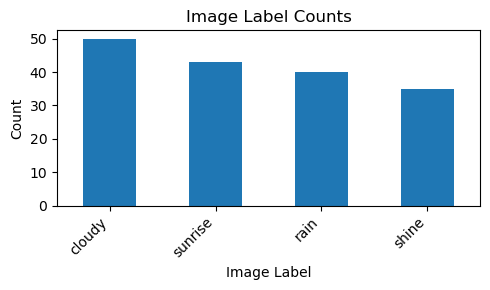

In [14]:
plt.figure(figsize=(5, 3))
label_counts.plot(kind='bar')
plt.title('Image Label Counts')
plt.xlabel('Image Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

**The first 10 rows of my_validation.csv file**

In [15]:
df1.head(10)

,File path,Image label
0,dataset2/cloudy113.jpg,cloudy
1,dataset2/sunrise273.jpg,sunrise
2,dataset2/sunrise205.jpg,sunrise
3,dataset2/cloudy111.jpg,cloudy
4,dataset2/sunrise226.jpg,sunrise
5,dataset2/sunrise102.jpg,sunrise
6,dataset2/sunrise203.jpg,sunrise
7,dataset2/cloudy183.jpg,cloudy
8,dataset2/rain74.jpg,rain
9,dataset2/cloudy221.jpg,cloudy


**Creating my_test.csv file**

In [16]:
#creating my_test.csv file
import csv
test_size = len(file_path) - train_size - val_size
test_set = file_path[train_size + val_size:]
test_labels = [re.match(r'^([a-zA-Z]+)', path.split("/")[-1]).group() for path in test_set]
test_data = list(zip(test_set, test_labels))
write_to_csv(test_data, 'my_test.csv')

In [17]:
df2=pd.read_csv("my_test.csv")
df2.shape

(170, 2)

**The label distribution of my_test.csv file**

In [18]:
label_counts = df2['Image label'].value_counts()
label_counts

sunrise    61
shine      39
cloudy     39
rain       31
Name: Image label, dtype: int64

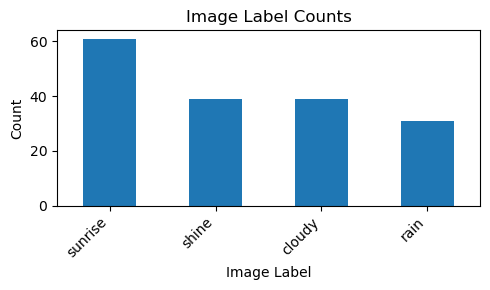

In [19]:
plt.figure(figsize=(5, 3))
label_counts.plot(kind='bar')
plt.title('Image Label Counts')
plt.xlabel('Image Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

**The first 10 rows of my_test.csv file**

In [20]:
df2.head(10)

,File path,Image label
0,dataset2/sunrise251.jpg,sunrise
1,dataset2/sunrise235.jpg,sunrise
2,dataset2/rain189.jpg,rain
3,dataset2/shine116.jpg,shine
4,dataset2/sunrise81.jpg,sunrise
5,dataset2/cloudy24.jpg,cloudy
6,dataset2/cloudy148.jpg,cloudy
7,dataset2/sunrise189.jpg,sunrise
8,dataset2/cloudy30.jpg,cloudy
9,dataset2/sunrise204.jpg,sunrise


### 1.2 - preprocessing and preparation (2 marks)

Use TensorFlow's `TextLineDataset` to generate datasets for training, validation, and test. The datasets need to produce images that are re-sized to dimensions 230 x 230 and 3 channels, and the values of the pixels must be normalised to the range [0, 1].


In [21]:
import tensorflow as tf
import keras

In [22]:
CLASS_NAMES=['cloudy', 'rain', 'shine', 'sunrise']

In [23]:
IMG_HEIGHT = 230
IMG_WIDTH = 230
IMG_CHANNELS = 3
def read_and_decode(filename, reshape_dims):
  # Read the file
  img = tf.io.read_file(filename)
  # Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resize the image to the desired size.
  return tf.image.resize(img, reshape_dims)


In [24]:
def decode_csv(csv_row):
  record_defaults = ["path", "Weather"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  label = tf.math.equal(CLASS_NAMES, label_string)
  return img, label

In [25]:
train_dataset = (tf.data.TextLineDataset(
    "training.csv").
    map(decode_csv)).batch(10)

eval_dataset = (tf.data.TextLineDataset(
    "validation.csv").
    map(decode_csv)).batch(10)

test_dataset = (tf.data.TextLineDataset(
    "test.csv").
    map(decode_csv)).batch(10)

## Task 2 - A simple classifier (4 marks)

### 2.1 First classifier (1 mark)

Create a simple model that contains the following layers:

- A `Flatten` layer.
- The output layer with the correct size and activation function for this classification task.

Then, train the model with the training data. Use the validation data to determine when to stop training. Finally, test the trained model on the test data and report the accuracy.

In [26]:
#Model Creation with a flatten layer and an output layer
model = keras.Sequential([
              keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
              keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])
#setting the model compiler
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\DeLL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
#Summary method to understand the structure of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 158700)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │         634,804 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 634,804 (2.42 MB)

 Trainable params: 634,804 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#training the model with the training data.
history = model.fit(train_dataset, validation_data=eval_dataset,epochs=10)

Epoch 1/10
     76/Unknown 4s 40ms/step - accuracy: 0.4897 - loss: 31.4419

C:\Users\DeLL\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.4939 - loss: 30.8223 - val_accuracy: 0.5808 - val_loss: 13.9818
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6635 - loss: 10.0102 - val_accuracy: 0.6527 - val_loss: 9.4303
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.6860 - loss: 7.9620 - val_accuracy: 0.7665 - val_loss: 6.5620
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.7116 - loss: 8.5288 - val_accuracy: 0.7006 - val_loss: 8.1681
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.7183 - loss: 7.7665 - val_accuracy: 0.7126 - val_loss: 7.9533
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.7516 - loss: 5.3196 - val_accuracy: 0.7246 - val_loss: 7.3527
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7123 - loss: 9.3736 - val_accuracy: 0.6587 - val_loss: 10.0135
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7019 - loss: 10.3499 - val_accuracy: 0.6886 - val_los

In [29]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        # ax[idx].set_ylabel(metric, fontweight='bold', fontsize=20)
        ax[idx].plot(history.history['val_' + metric], ls='dashed');
        ax[idx].legend([metric, 'val_' + metric], fontsize=20)

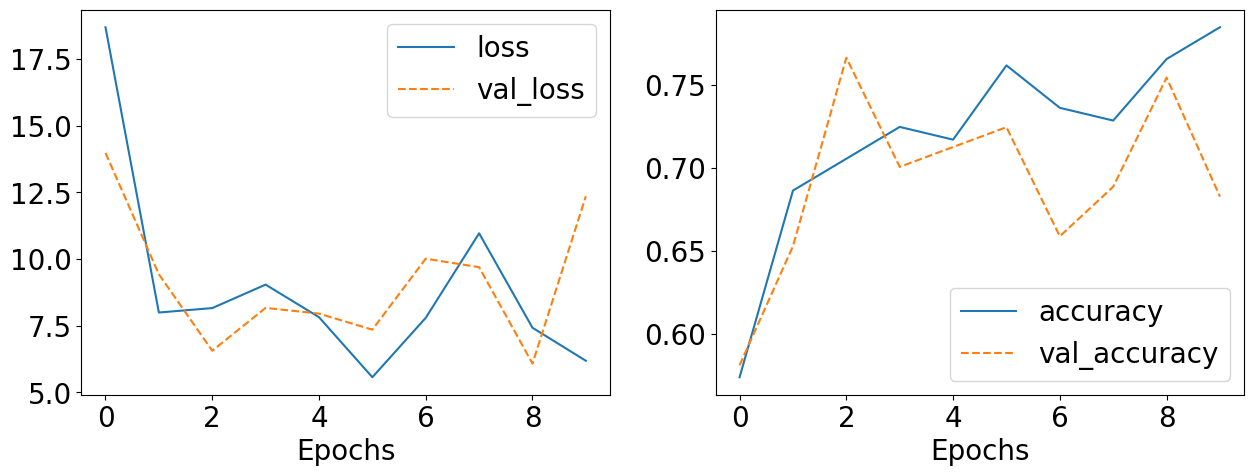

In [30]:
training_plot(['loss', 'accuracy'], history);

The plot shows that the system overfits quickly. We can use Keras' call back system to instruct the model to do stop early, as soon as the results in the validation data do not improve:

In [31]:
#Model Creation with a flatten layer and an output layer
model= keras.Sequential([
              keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
              keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])
#setting the model compiler
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#keras.callbacks.EarlyStopping(patience=1): This creates an instance of the EarlyStopping callback with a patience of 1 epoch. 
history = model.fit(
    train_dataset, validation_data=eval_dataset, epochs=10,
    callbacks=[keras.callbacks.EarlyStopping(patience=1)]
)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.4800 - loss: 21.6662 - val_accuracy: 0.4790 - val_loss: 23.7622
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.6619 - loss: 10.3462 - val_accuracy: 0.5329 - val_loss: 25.6366


In [32]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4309 - loss: 32.9774
Test Accuracy: 0.4674556255340576


The test accuracy of a simple classifier model is 46.74%

### 2.2 A more complex classifier (2 marks)

Try a more complex architecture that has 1 or more hidden layers with dropout. For this more complex architecture, use `keras-tuner` and run it with a reasonable choice of possible parameters. You may try among the following:

- Number of hidden layers
- Sizes of hidden layers
- Dropout rate
- Learning rate

In [33]:
#Model Creation with a flatten layer, hidden layers, an output layer with dropout rate
from tensorflow.keras import models
from tensorflow.keras import layers
def build_deep_nn(rows, columns, channels, num_hidden, hidden_sizes,
                  dropout_rates,output_size, output_activation):
        
     model = models.Sequential()
     model.add(layers.Flatten(input_shape=(rows,columns,channels)))
     for i in range(num_hidden):
         model.add(layers.Dense(hidden_sizes[i], activation='relu'))
         if dropout_rates[i] > 0:
             model.add(layers.Dropout(dropout_rates[i]))
     model.add(layers.Dense(units=output_size, activation=output_activation))
    
     return model


In [34]:
model_complex_classifier = build_deep_nn(230, 230, 3, 2, (40, 20), (0, 0.5), 4, 'sigmoid')
model_complex_classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 158700)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40)                  │       6,348,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,348,944 (24.22 MB)

 Trainable params: 6,348,944 (24.22 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model_complex_classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model_complex_classifier.fit(train_dataset, validation_data=eval_dataset,epochs=10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.3079 - loss: 10.0185 - val_accuracy: 0.4790 - val_loss: 0.9128
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.3707 - loss: 1.1411 - val_accuracy: 0.5150 - val_loss: 0.8697
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.4210 - loss: 1.0517 - val_accuracy: 0.5928 - val_loss: 0.8677
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.5320 - loss: 1.0342 - val_accuracy: 0.5329 - val_loss: 0.8246
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.4764 - loss: 1.0247 - val_accuracy: 0.5569 - val_loss: 0.8003
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.5225 - loss: 1.1021 - val_accuracy: 0.5329 - val_loss: 0.8027
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.4895 - loss: 1.0487 - val_accuracy: 0.5868 - val_loss: 0.7995
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.4853 - loss: 1.0088 - val_acc

In [37]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_complex_classifier.evaluate(test_dataset)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6284 - loss: 0.8992
Test Accuracy: 0.639053225517273


**Using Keras Tuner to find the optimal parameters**

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import keras_tuner as kt
import keras
def build_model(hp):
    # Define hyperparameters
    num_hidden = hp.Int('num_hidden', 1, 3)
    dropout_rate = hp.Float('dropout', 0.0, 0.5)
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(230, 230, 3)))
    
    # Add dense layers based on num_layers
    for i in range(num_hidden):
        # Define units and activation for each dense layer
        units = hp.Int('units_' + str(i), min_value=20, max_value=200, step=20)
        
        
        # Add dense layer with defined units and activation
        model.add(keras.layers.Dense(units=units, activation=keras.activations.relu))
        
        # Add dropout layer for the last dense layer
        if i == num_hidden - 1:
            dropout = hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)
            model.add(keras.layers.Dropout(rate=dropout))
    
    # Output layer
    model.add(keras.layers.Dense(4, activation='sigmoid'))
   
    # Define optimizer with the chosen learning rate
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [52]:
#Creating a BayesianOptimization tuner using the specified model
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective('val_accuracy', 'max'), 
    max_trials=5,
    num_initial_points=2, 
    overwrite=True,
    project_name='weather_bayesian'  
)

tuner.search(train_dataset, epochs=5, validation_data=eval_dataset)
topN = 1
for x in range(topN):
  print(tuner.get_best_hyperparameters(topN)[x].values)
  print(tuner.get_best_models(topN)[x].summary())

Trial 5 Complete [00h 01m 25s]
val_accuracy: 0.7544910311698914

Best val_accuracy So Far: 0.7844311594963074
Total elapsed time: 00h 07m 34s
{'num_hidden': 2, 'dropout': 0.018254030162180912, 'units_0': 60, 'optimizer': 'adam', 'learning_rate': 0.0001, 'units_1': 20}


C:\Users\DeLL\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 158700)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 60)                  │       9,522,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,523,364 (36.33 MB)

 Trainable params: 9,523,364 (36.33 MB)

 Non-trainable params: 0 (0.00 B)

None


In [53]:
print(tuner.get_best_hyperparameters(1)[0].values)

{'num_hidden': 2, 'dropout': 0.018254030162180912, 'units_0': 60, 'optimizer': 'adam', 'learning_rate': 0.0001, 'units_1': 20}


In [54]:
import keras_tuner as kt
best_parameters = tuner.get_best_hyperparameters(num_trials=1)[0]
model_tuned = tuner.hypermodel.build(best_parameters)

model_tuned.fit(train_dataset,epochs=10,batch_size=128,validation_data=eval_dataset)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.4863 - loss: 2.2510 - val_accuracy: 0.6647 - val_loss: 0.7785
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - accuracy: 0.6782 - loss: 0.7681 - val_accuracy: 0.6886 - val_loss: 0.7421
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - accuracy: 0.7563 - loss: 0.6074 - val_accuracy: 0.7006 - val_loss: 0.7033
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - accuracy: 0.7734 - loss: 0.6065 - val_accuracy: 0.7246 - val_loss: 0.6619
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.7742 - loss: 0.5981 - val_accuracy: 0.6946 - val_loss: 0.7592
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.7591 - loss: 0.5742 - val_accuracy: 0.6946 - val_loss: 0.7661
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - accuracy: 0.7920 - loss: 0.5298 - val_accuracy: 0.7365 - val_loss: 0.7085
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.7870 - loss: 0.5054 - val_accu

In [55]:
test_loss, test_acc = model_tuned.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc}')


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7068 - loss: 0.6118
Test Accuracy: 0.7396449446678162


Write text below where you explain and justify your decision choices made in this task.

#### The hyperparameters of the optimal model
* Number of hidden layers: 2
* Sizes of hidden layers:
    * For the first hidden layer (units_0): 60 units
    * For the second hidden layer (units_1): 20 units
* Dropout rate: 0.01825
* Learning rate: 0.0001
* optimizer: adam

**The test accuracy of model_complex_classifier is 63.90%. After applying the keras tuner, with optimal hyperparameters we got the test accuracy of model_tuned has been improved to 73.96%**

### 2.3 Error analysis (1 mark)

Evaluate your best-performing system from task 2 against the system of task 1 and answer the following questions.

1. Which system had a better accuracy on the test data?
2. Which system had a lower degree of overfitting?

1. Which system had a better accuracy on the test data?
       


In [56]:

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
test_loss_1, test_acc_1 = model_tuned.evaluate(test_dataset)


# Print the test accuracy
print("Test Accuracy of First Classifier Model:", test_accuracy)
print("Test Accuracy of Keras Tuned Model:", test_acc_1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4309 - loss: 32.9774
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7068 - loss: 0.6118
Test Accuracy of First Classifier Model: 0.4674556255340576
Test Accuracy of Keras Tuned Model: 0.7396449446678162


The keras Tuned Model has better accuracy of 73.96% compared to a simple model built in first classifier task which give accuracy of 46.74%.

2. Which system had a lower degree of overfitting?

In [57]:
train_loss, train_acc = model.evaluate(train_dataset)
eval_loss, eval_acc = model.evaluate(eval_dataset)
print("First Classifier Model:")
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", eval_acc)
overfitting_degree_1=train_acc-eval_acc
print("Overfitting Degree:", overfitting_degree_1)


train_loss_1, train_acc_1 = model_tuned.evaluate(train_dataset)
eval_loss_1, eval_acc_1 = model_tuned.evaluate(eval_dataset)
print("\nKeras Tuned Model:")
print("Training Accuracy:", train_acc_1)
print("Validation Accuracy:", eval_acc_1)
overfitting_degree_2=train_acc_1-eval_acc_1
print("Overfitting Degree:", overfitting_degree_2)


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5048 - loss: 26.9709
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5254 - loss: 24.9960
First Classifier Model:
Training Accuracy: 0.5339308381080627
Validation Accuracy: 0.5329341292381287
Overfitting Degree: 0.000996708869934082
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8246 - loss: 0.5571
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7987 - loss: 0.6861

Keras Tuned Model:
Training Accuracy: 0.8169013857841492
Validation Accuracy: 0.7664670944213867
Overfitting Degree: 0.05043429136276245


Comparing the overfitting degrees, it's clear that the first classifier model has a lower degree of overfitting (0.00099) compared to the Keras tuned model (0.05043).It suggests that the model is generalizing slightly better on validation data, which might be due to the simpler model. So, the first classifier model had a lower degree of overfitting.

## Task 3 - A more complex classifier (5 marks)

### Task 3.1 Using ConvNets (2 marks)

Implement a model that uses a sequence of at least two `ConvD`, each one followed with `MaxPooling2D`. Use reasonable numbers for the hyperparameters (number of filters, kernel size, pool size, activation, etc), base on what we have seen in the lectures. Feel free to research the internet and / or generative AI to help you find a reasonable choice of hyperparameters. For this task, do not use pre-trained models.

In [58]:
from keras import layers
from keras import models

ConvNets_model = models.Sequential()
ConvNets_model.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(230, 230,3)))
ConvNets_model.add(layers.MaxPooling2D(pool_size=2))
ConvNets_model.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
ConvNets_model.add(layers.MaxPooling2D(pool_size=2))
ConvNets_model.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
ConvNets_model.add(layers.Flatten())
ConvNets_model.add(layers.Dense(4, activation="softmax"))

C:\Users\DeLL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [59]:
ConvNets_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 228, 228, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 114, 114, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 54, 54, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 373248)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │       1,492,996 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,586,244 (6.05 MB)

 Trainable params: 1,586,244 (6.05 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
ConvNets_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [61]:
history = ConvNets_model.fit(train_dataset, epochs=10, batch_size=128,
                          validation_data=eval_dataset,
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 419ms/step - accuracy: 0.5771 - loss: 1.4000 - val_accuracy: 0.6766 - val_loss: 0.7148
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 412ms/step - accuracy: 0.7812 - loss: 0.5690 - val_accuracy: 0.7784 - val_loss: 0.5969
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 410ms/step - accuracy: 0.8685 - loss: 0.3814 - val_accuracy: 0.8204 - val_loss: 0.6042


In [62]:
test_loss, test_acc = ConvNets_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc}')


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8261 - loss: 0.3840
Test Accuracy: 0.8461538553237915


### Task 3.2 Using pre-trained models (2 marks)

Use MobileNet, pre-trained on imagenet as discussed in the lectures. Add the correct classification layer, and train it with your data. Make sure that you freeze MobileNet's weights during training. Also, make sure you use a reasonable schedule for the learning rate.

In [78]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
CLASS_NAMES=['cloudy', 'rain', 'shine', 'sunrise']
def read_and_decode(filename, reshape_dims):
  # Read the file
  img = tf.io.read_file(filename)
  # Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resize the image to the desired size.
  return tf.image.resize(img, reshape_dims)


In [79]:
def decode_csv(csv_row):
  record_defaults = ["path", "Weather"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  label = tf.math.equal(CLASS_NAMES, label_string)
  return img, label

In [80]:
train_dataset_1 = (tf.data.TextLineDataset(
    "training.csv").
    map(decode_csv)).batch(10)

eval_dataset_1 = (tf.data.TextLineDataset(
    "validation.csv").
    map(decode_csv)).batch(10)

test_dataset_1 = (tf.data.TextLineDataset(
    "test.csv").
    map(decode_csv)).batch(10)

In [81]:
LEARNING_RATE = 0.001
EPOCHS = 20
# fetch the MobileNet model
mobilenet_model = tf.keras.applications.MobileNet(weights="imagenet",
                                                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
                                                  include_top=False,
                                                  pooling="avg")
for layer in mobilenet_model.layers:
    layer.trainable = False

model_mobilenet = tf.keras.Sequential()
model_mobilenet.add(mobilenet_model)
model_mobilenet.add(tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax', name='weather_classification'))
model_mobilenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss = 'categorical_crossentropy',
    metrics=['categorical_accuracy']
)



In [82]:
model_mobilenet.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ ?                           │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ weather_classification (Dense)       │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [83]:
# Learning rate schedule

Learning rate schedule: 1e-05 to 5e-05 to 1.02e-05


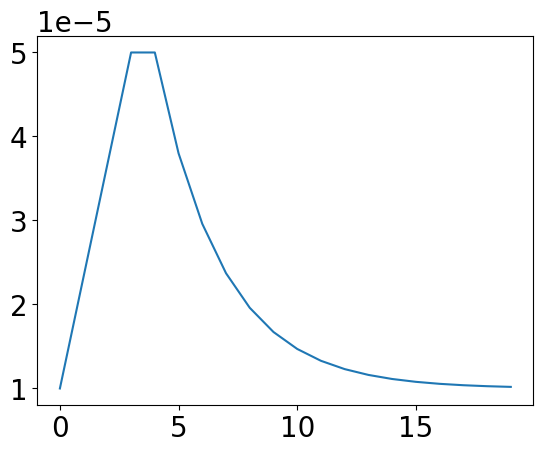

In [84]:
EPOCHS = 20

# Learning rate schedule
LR_START = 0.00001
LR_MAX = 0.00005
LR_MIN = 0.00001
LR_RAMPUP_EPOCHS = 3
LR_SUSTAIN_EPOCHS = 1
LR_EXP_DECAY = .7

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))


In [85]:
BATCH_SIZE = 32

history = model_mobilenet.fit(train_dataset_1, validation_data=eval_dataset_1, epochs=EPOCHS,
                    callbacks=[lr_callback, tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                             patience=3)])


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 327ms/step - categorical_accuracy: 0.2461 - loss: 1.8375 - val_categorical_accuracy: 0.2455 - val_loss: 1.6775 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 2.3333333333333336e-05.
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 340ms/step - categorical_accuracy: 0.2476 - loss: 1.6710 - val_categorical_accuracy: 0.2575 - val_loss: 1.4642 - learning_rate: 2.3333e-05

Epoch 3: LearningRateScheduler setting learning rate to 3.666666666666667e-05.
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 384ms/step - categorical_accuracy: 0.2901 - loss: 1.4630 - val_categorical_accuracy: 0.3593 - val_loss: 1.2837 - learning_rate: 3.6667e-05

Epoch 4: LearningRateScheduler setting learning rate to 5e-05.
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 348ms/step - categorical_accuracy: 0.4002 - loss: 1.2866 - val_categorical_accuracy: 0.4731 - val_loss: 1.1300 - learning_rate

In [86]:
model_mobilenet.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 1024)                │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ weather_classification (Dense)       │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,241,166 (12.36 MB)

 Trainable params: 4,100 (16.02 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 8,202 (32.04 KB)

In [87]:
test_loss, test_acc = model_mobilenet.evaluate(test_dataset_1)
print(f'Test Accuracy: {test_acc}')


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - categorical_accuracy: 0.8081 - loss: 0.6657
Test Accuracy: 0.834319531917572


### Task 3.3 Comparative evaluation (1 mark)

Compare the evaluation results of the best systems from tasks 3.1 and 3.2 and answer the following questions.

1. What system (including the systems you developed in Task 2) perform best on the test set?
2. Report the accuracy of your best system on each of the different weather categories. What type of weather was most difficult to detect?

1.What system (including the systems you developed in Task 2) perform best on the test set?


In [88]:

# Evaluate the model on the test dataset

test_loss, test_acc = model_tuned.evaluate(test_dataset)
test_loss_1, test_acc_1 = ConvNets_model.evaluate(test_dataset)
test_loss_2, test_acc_2 = model_mobilenet.evaluate(test_dataset_1)


# Print the test accuracy
print("Test Accuracy of Keras Tuned Model:", test_acc)
print("Test Accuracy of ConvNets Model:",test_acc_1)
print("Test Accuracy of Mobilenet pre trained Model:", test_acc_2)





17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7068 - loss: 0.6118
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8261 - loss: 0.3840
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - categorical_accuracy: 0.8081 - loss: 0.6657
Test Accuracy of Keras Tuned Model: 0.7396449446678162
Test Accuracy of ConvNets Model: 0.8461538553237915
Test Accuracy of Mobilenet pre trained Model: 0.834319531917572


The ConvNets Model performs best on test data with test accuracy of 84.61%

2.Report the accuracy of your best system on each of the different weather categories. What type of weather was most difficult to detect?

In [90]:
# Evaluation
true_labels = []
for img, label in test_dataset:
    true_labels.extend(np.argmax(label.numpy(), axis=1))

true_labels = np.array(true_labels)
predictions = ConvNets_model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

for i, label in enumerate(CLASS_NAMES):
    category_accuracy = np.mean(predicted_labels[true_labels == i] == i)
    print(f"Accuracy for {label}: {category_accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
Accuracy for cloudy: 0.8627450980392157
Accuracy for rain: 1.0
Accuracy for shine: 0.45714285714285713
Accuracy for sunrise: 1.0


Shine type of weather was most difficult to detect with least test accuracy of  45.714%

## Coding (1 mark)

This mark will be assigned to submissions that have clean and efficient code and good in-code documentation of all code presented in this assignment.

## GitHub Classroom (1 mark)

These marks will be given to submissions that:

- Have continuously committed changes to the GitHub repository at GitHub Classroom.
- The commit messages are useful and informative.

# Submission

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook as text cells. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**

**Do not submit multiple files. If you feel you need to submit multiple files, please contact Diego.Molla-Aliod@mq.edu.au first.**

Examine the text cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this useful [guide to the MarkDown notation](https://daringfireball.net/projects/markdown/syntax), which explains the format of the text cells.

Each task specifies a number of marks. The final mark of the assignment is the sum of all the marks of each individual task.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per [the academic integrity policy](https://policies.mq.edu.au/document/view.php?id=3).

## A note on the use of AI code generators

In this assignment, we view AI code generators such as copilot, CodeGPT, etc as tools that can help you write code quickly. You are allowed to use these tools, but with some conditions. To understand what you can and what you cannot do, please visit these information pages provided by Macquarie University.

- Artificial Intelligence Tools and Academic Integrity in FSE - https://bit.ly/3uxgQP4

If you choose to use these tools, make the following explicit in your Jupyter notebook, under a section with heading "Use of AI generators in this assignment" :

- What part of your code is based on the output of such tools,
- What tools you used,
- What prompts you used to generate the code or text, and
- What modifications you made on the generated code or text.

This will help us assess your work fairly.
